In [1]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import arviz as az
import preliz as pz

from ipywidgets import interact
import ipywidgets as ipyw

In [2]:
az.style.use('arviz-white')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "False",
              "progress": "False",
              "shortcut": "False",});


<center><img src="img/logo_inst.png" width="750">
<br>
<br>
<br>
<br>
<h1 align="center">Introducci√≥n a la probabilidad</h1>



<br>
<br>
<br>
<br>
<br>

## Objetivos

* Lograr una comprensi√≥n general de conceptos b√°sicos en probabilidad

## Probabilidades

* Definimos un **espacio de muestreo** $\mathcal{X}$ como el conjunto que contiene todos los posibles resultados de un experimento.
    * Para un dado de 6 caras tenemos: $\mathcal{X} = \{1, 2, 3, 4, 5, 6\}$


* Un evento $A$ es un subconjunto de $\mathcal{X}$.
    * Podr√≠amos tener que $A = \{2\}$
    * O quiz√° $A = \{1, 3, 5\}$ 


* Un evento $A$ ha ocurrido si el resultado de un experimento es $A$.


* Para indicar la **probabilidad** de un evento $A = \{2\}$ escribimos $P(A=2)$ o de forma resumida $P(A)$. 

## Probabilidades (cont)

<br>


* $P(A)$ es un valor en el intervalo [0, 1]
    * $0 \implies A$ es imposible
    * $1 \implies A$ es seguro

* Una probabilidad total es una cantidad conservada (siempre suma 1)

* Las distribuciones de probabilidad *acomodan* o *distribuyen* probabilidades entre los eventos posibles


* Las distribuciones de probabilidad se dividen com√∫nmente en dos clases:
    * Discretas
    * Continuas

In [5]:
def dist_dice(Œ±, Œ≤):  # plot the pmf of a discrete distribution representing a die
    n = 5
    x = np.arange(0, 6)
    dist_pmf = special.binom(n, x) * (special.beta(x+Œ±, n-x+Œ≤) / special.beta(Œ±, Œ≤))
    plt.vlines(x, 0, dist_pmf, colors='C0', lw=4);
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('pmf(x)')
    plt.xticks(x, x+1)


interact(dist_dice,
         Œ±=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         Œ≤=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='Œ±', max=10.0, min=0.5, step=0.5), FloatSlider(value=‚Ä¶

In [6]:
def beta_scaled(Œ±, Œ≤):
    x = np.linspace(0, 1, 130)
    beta = stats.beta(Œ±, Œ≤)
    plt.plot(x*6, beta.pdf(x)/6)
    plt.yticks([])
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('pdf(x)')

interact(beta_scaled,
         Œ±=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         Œ≤=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='Œ±', max=10.0, min=0.5, step=0.5), FloatSlider(value=‚Ä¶

## Recapitulando

<br>

* Las probabilidades son  n√∫meros en el intervalo [0, 1]


* Para distribuciones discretas la *suma de las alturas de las barras* debe ser 1


* Para distribuciones continuas el *√°rea total bajo la curva* debe ser 1


* Las distribuciones de probabilidad distribuyen probabilidades entre los eventos posibles

## Probabilidades, c√≠rculos y el mundo plat√≥nico

<br>

* Las distribuciones de probabilidad tienen f√≥rmulas matem√°ticas precisas, similares a c√≥mo un c√≠rculo tiene una definici√≥n matem√°tica precisa.
     * _Un c√≠rculo es el conjunto de todos los puntos que son equidistantes de un punto dado, el centro_


* Las distribuciones de probabilidad vienen en familias, cada miembro difiere del resto solo por el valor de sus par√°metros.
    * No hay un solo c√≠rculo, sino la *familia de c√≠rculos* donde cada miembro difiere del resto solo por el valor del par√°metro `radio`.



* Ni las distribuciones de probabilidad ni los c√≠rculos son objetos aleatorios.


* La aleatoriedad proviene de los experimentos.

In [7]:
def dado(p=None):  # este es un modelo de un dado
    espacio_muestreal = [1, 2, 3, 4, 5, 6]    
    return np.random.choice(espacio_muestreal, p=p)

dado()  # Esto simula la tirada de un dado

1

In [8]:
def experimento(N=10):
    #muestra = [dado() for i in range(N)]
    muestra = [dado(p=[0.2, 0.5, 0.3, 0, 0, 0]) for i in range(N)]

    for i in range(1, 7):
        print(f'{i}: {muestra.count(i)/N:.2g}')
        
experimento()

1: 0.2
2: 0.3
3: 0.5
4: 0
5: 0
6: 0


## Probabilidad condicional y probabilidad conjunta

<br>
<br>

Dado dos eventos $A$ y $B$ si $P(B) > 0$, la probabilidad de $A$ dado $B$ se define como:

<br>

$$
P(A \mid B) \triangleq \frac{P(A, B)}{P(B)}
$$

<br>

* $P(A, B)$ es la probabilidad conjunta, *i.e.* la probabilidad que tanto el evento $A$ como el $B$ sucedan, a veces se escribe como $P(A \cap B)$

<center>
<img src='img/cond.png' width=700 >
</center>
<br>

* Una probabilidad condicional re-define el espacio muestreal


* Condicionar es el *alma* de la estad√≠stica


* Todas las probabilidades son condicionales, a√∫n cuando no se indique expl√≠citamente. Siempre hay conocimiento previo (o suposiciones) incorporado en cada probabilidad

## Variables aleatorias

* Una variable aleatoria es una funci√≥n que asocia n√∫meros reales $\mathbb{R}$ con un espacio muestral. 
* Para una tirada de un dado podemos asociar ‚öÄ con el n√∫mero 1, ‚öÅ con el 2, etc.
* Si tuvi√©ramos dos dados podr√≠amos definir una variable aleatoria $S$ como la suma de ambos dados. Por lo que $S$ podr√≠a tomar los valores $\{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12\}$
* Si los dados no est√°n trucados la distribuci√≥n de probabilidad de $S$ ser√≠a:

<a href="https://en.wikipedia.org/wiki/File:Dice_Distribution_(bar).svg"><img src='img/dist_dos_dados.png' width=500 ></a>

## Variables aleatorias  (cont)

<br>

* Otra variable aleatoria podr√≠a ser $C$ cuyo espacio muestral es $\{rojo, verde, azul\}$.


* Si los eventos de inter√©s fuesen `rojo, verde, azul,` entonces podr√≠amos *codificarlos* como `C(rojo) = 0, C(verde)=1, C(azul)=2`


* Una variable es aleatoria en el sentido de que en cada *experimento* es posible obtener un evento distinto sin que la sucesi√≥n de eventos siga un patr√≥n determinista. 
    * La variable NO puede tomar cualquier valor posible, $C$ solo puede tomar 3 valores.
    * *Aleatorio* NO implica que todos los eventos tienen igual probabilidad.

## Distribuciones de probabilidad

<br>

* A una variable aleatoria le podemos asociar una *lista* con la probabilidad de cada evento


* Esa lista se llama distribuci√≥n de probabilidad


* Si la variable es discreta (como $C$) la distribuci√≥n de probabilidad se la llama funci√≥n de masa de probabilidad (o **pmf** por su sigla en ingl√©s).


* Una $pmf$ devuelve probabilidades.

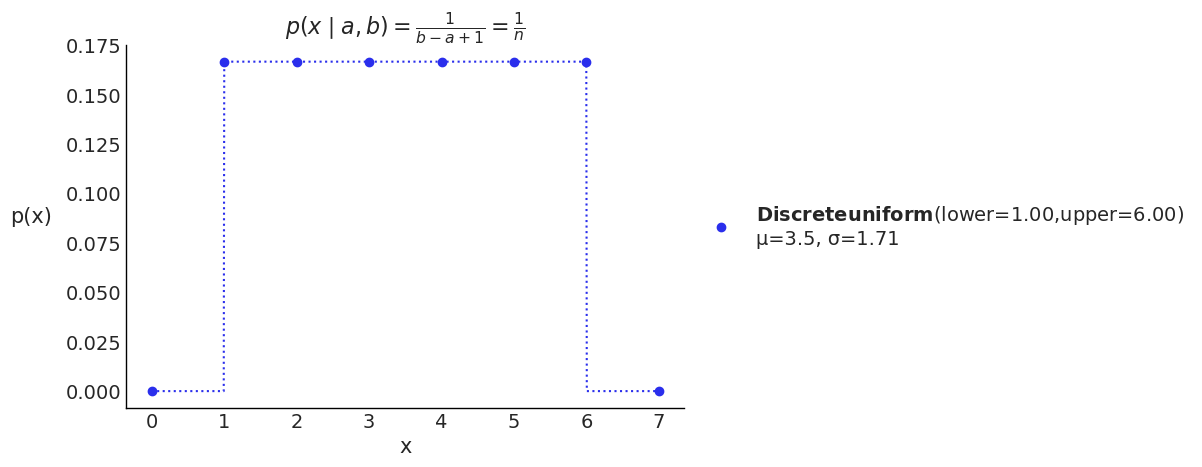

In [9]:
dist = pz.DiscreteUniform(lower=1, upper=6)

ax = dist.plot_pdf(moments="md", support=(0, 7))

ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25)
ax.set_title(r'$p(x \mid a, b)={\frac {1}{b - a + 1}} = \frac{1}{n}$');

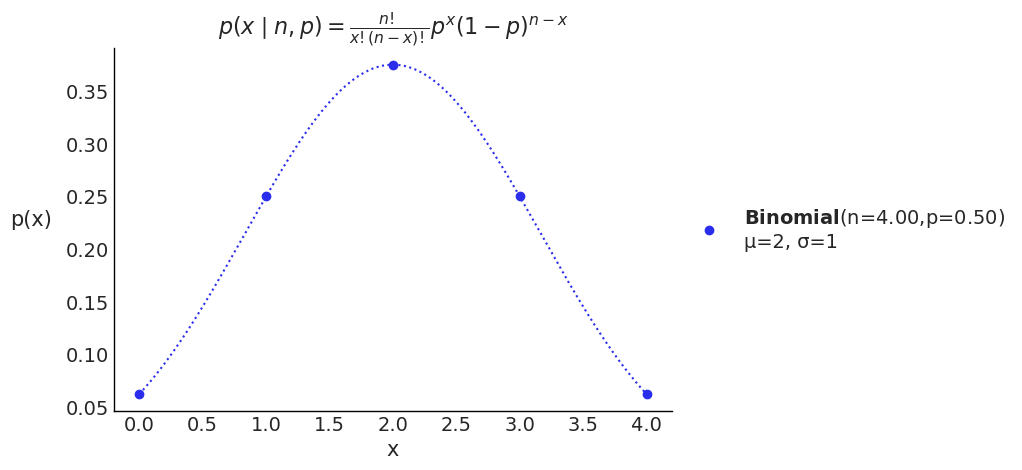

In [10]:
dist = pz.Binomial(n=4, p=0.5)
ax = dist.plot_pdf(moments="md")
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25)
ax.set_title(r'$p(x \mid n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$');

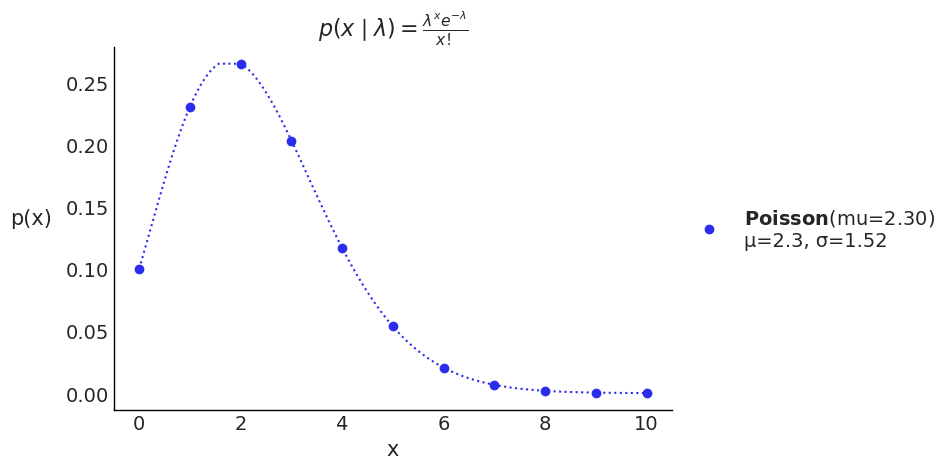

In [11]:
dist = pz.Poisson(mu=2.3)
ax = dist.plot_pdf(moments="md")
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25);
ax.set_title(r'$p(x \mid \lambda) = \frac{\lambda^{x} e^{-\lambda}}{x!}$');

## Distribuciones de probabilidad continuas

* Si la variable aleatoria es continua (por ejemplo longitud de onda) la distribuci√≥n de probabilidad se la llama funci√≥n de densidad de probabilidad (o **pdf** por su sigla en ingl√©s).
* Una `pdf` devuelve densidades de probabilidad, pero no probabilidades
* Para obtener una probabilidad a partir de una `pdf` es necesario integrar una `pdf`

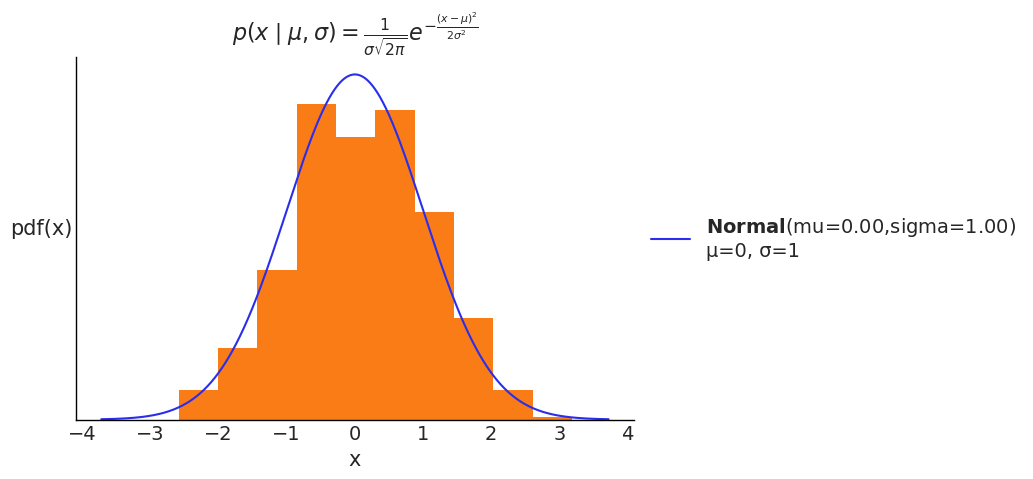

In [12]:
dist = pz.Normal(mu=0, sigma=1)  
x_rvs = dist.rv_frozen.rvs(500)
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);
ax.set_title(r'$p(x \mid \mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}} $');

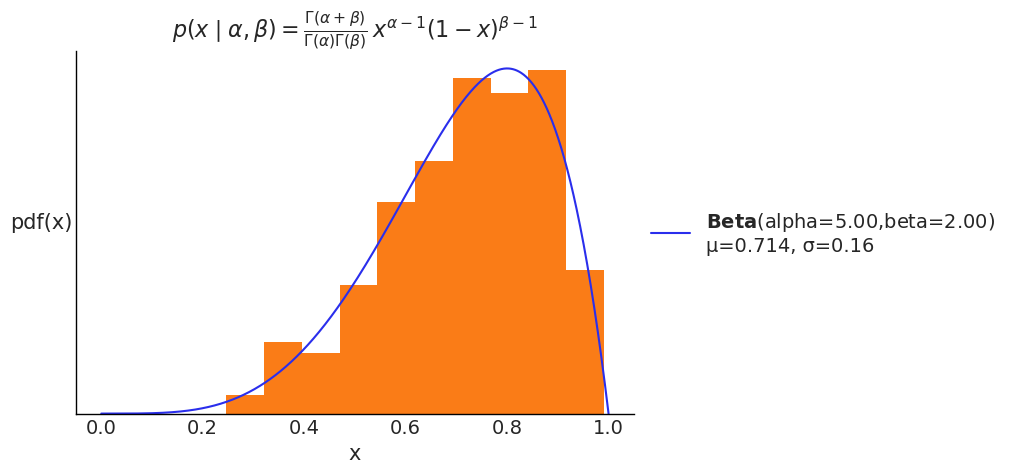

In [13]:
dist = pz.Beta(5, 2)  
x_rvs = dist.rv_frozen.rvs(500)  # muestrear 500 valores de la distribuci√≥n
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);
ax.set_title(r'$p(x \mid \alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1}$');

### Distribuci√≥n acumulada


* La funci√≥n de distribuci√≥n acumulada (`cdf` en ingl√©s) es una forma alternativa (a la pdf/pmf) de representar distribuciones

* La `cdf` se obtiene al integrar una `pdf`.


<img src='img/cmf_pdf_pmf.png' width=600 >

[Think Stats](http://greenteapress.com/thinkstats2/html/index.html)

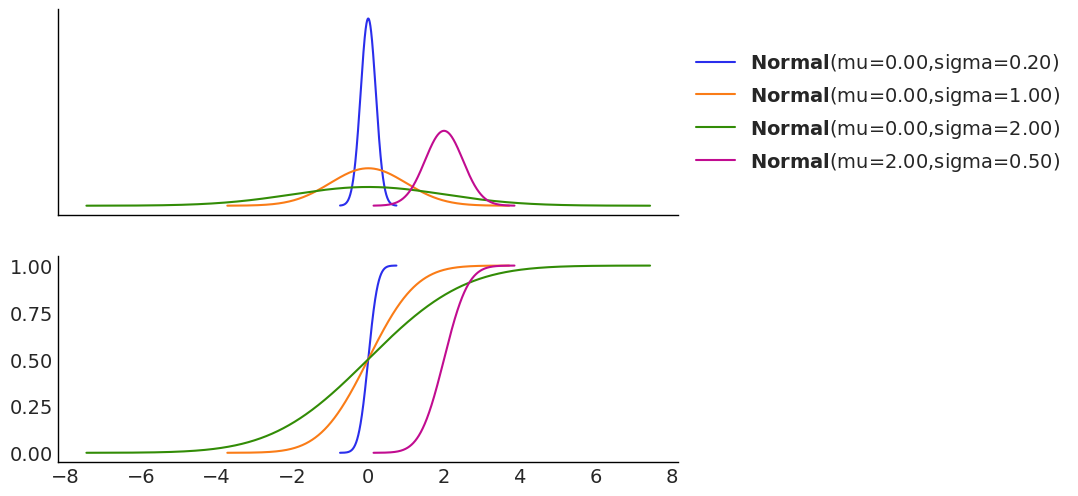

In [14]:
_, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
x_valores = np.linspace(-4, 4, 500)
valores = [(0., .2), (0., 1.), (0., 2.), (2., .5)]
for val in valores:
    pz.Normal(*val).plot_pdf(ax=ax[0])
    pz.Normal(*val).plot_cdf(ax=ax[1])
    ax[1].get_legend().remove()

##  Relaci√≥n entre probabilidades conjuntas, condicionales y marginales

<br>
<center>
<img src="img/probabilidades.png" width=500>
</center>

* Probabilidad conjunta $p(x, y)$
* Probabilidad marginal $p(x)$ o $p(y)$ 
* Probabilidad condicional $p(x \mid y)$

$$
p(\mathit{X}, \mathit{Y}) = p(\mathit{X} \mid \mathit{Y}) {p(\mathit{Y})}
$$

* $p(\mathit{X} \mid \mathit{Y})$ es una *rebanada* de $p(\mathit{X}, \mathit{Y})$; rebanada que tomamos *a la altura* de $\mathit{Y}$

* Si tomamos todas las rebanadas entonces obtendremos $p(\mathit{X}, \mathit{Y})$


* Para obtener las probabilidades marginales, las que se encuentran en los *m√°rgenes* üòâ:

$$
p(\mathit{X}) = \sum_\mathit{Y} p(\mathit{X}, \mathit{Y}) = \sum_\mathit{Y} p(\mathit{X} \mid \mathit{Y}) {p(\mathit{Y})}
$$ 

Cambiando la sumatoria por una integral para distribuciones continuas.

## La ley de los grandes n√∫meros

<br>


* El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribuci√≥n. 


* Esto no es cierto para algunas distribuciones como la distribuci√≥n de Cauchy (la cual no tiene media ni varianza finita).


* La paradoja del apostador se suele justificar con una versi√≥n intuitiva (y errada) de la ley de los grandes n√∫meros.


<br>

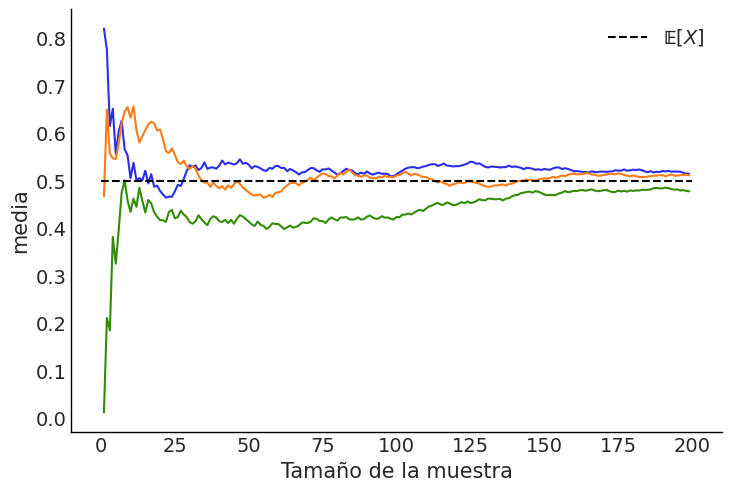

In [15]:
tama√±o_muestra = 200
muestras = range(1, tama√±o_muestra)
dist = stats.uniform(0, 1)
media_verdadera = dist.stats(moments='m')

for _ in range(3):
    muestra = dist.rvs(tama√±o_muestra)
    media_estimada = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, media_estimada, lw=1.5)

plt.hlines(media_verdadera, 0, tama√±o_muestra, linestyle='--', color='k', label=r'$\mathbf{\mathbb{E}}[\mathit{X}]$')
plt.legend()
plt.ylabel("media")
plt.xlabel("Tama√±o de la muestra");

### El teorema central del l√≠mite

* Si tomamos $n$ valores (de forma independiente) de una distribuci√≥n arbitraria la media $\bar X$ de esos valores se _distribuir√° aproximadamente como_ una Gaussiana a medida que ${n \rightarrow \infty}$:

$$
\bar X_n \dot\sim \mathcal{N} \left(\mu,  \frac{\sigma^2}{n}\right)
$$

Donde $\mu$ y $\sigma^2$ son la media y varianza del proceso estudiado (o de la poblaci√≥n).

Para que el teorema del l√≠mite central se cumpla se deben cumplir los siguientes supuestos:

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribuci√≥n
1. La media y la desviaci√≥n est√°ndar de la distribuci√≥n tiene que ser finitas

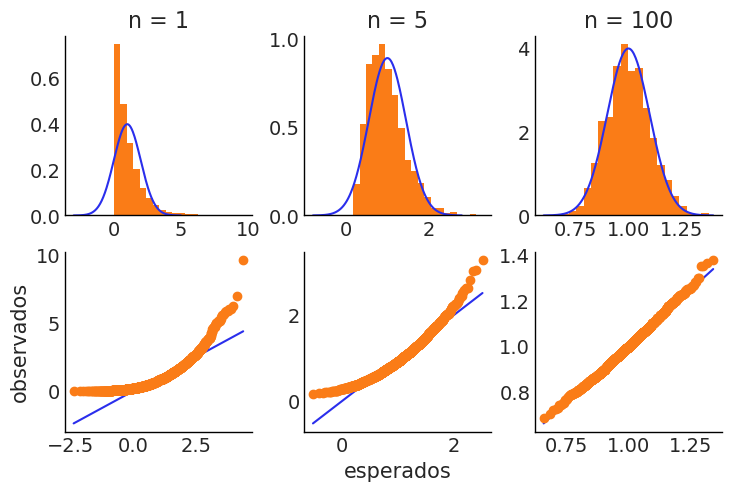

In [16]:
iters = 2000
distri = stats.expon(scale=1)
media, var = distri.stats(moments='mv')

_, ax = plt.subplots(2, 3, constrained_layout=True)

for i, n in enumerate([1, 5, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)

    sd = (var/n)**0.5 
    x = np.linspace(media - 4 * sd, media + 4 * sd, 200)
    ax[0, i].plot(x, stats.norm(media, sd).pdf(x))
    ax[0, i].hist(sample, density=True, bins=20)
    ax[0, i].set_title('n = {}'.format(n))
    osm, osr = stats.probplot(sample, dist=stats.norm(media, sd), fit=False)
    ax[1, i].plot(osm, osm)
    ax[1, i].plot(osm, osr, 'o')
ax[1, 0].set_ylabel('observados')
ax[1, 1].set_xlabel('esperados');

## Para seguir Leyendo

<br>
<br>

* [Probability and Bayesian Modeling](https://bayesball.github.io/BOOK/probability-a-measurement-of-uncertainty.html) de Jim Albert & Jingchen Hu

* [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability-Second-Edition/Blitzstein-Hwang/p/book/9781138369917) de Joseph K. Blitzstein & Jessica Hwang

* [Probability Theory (For Scientists and Engineers)](https://betanalpha.github.io/assets/case_studies/probability_theory.html) de Michael Betancourt

## Ejercicios

1. De las siguientes expresiones cual(es) se corresponde(n) con el enunciado "la probabilidad de lluvia dado que es 25 de Mayo de 1810"?
    * p(lluvia)
    * p(lluvia | mayo)    
    * p(lluvia | 25 de Mayo de 1810)
    * p(25 de Mayo de 1810 | lluvia)
    * p(lluvia, 25 de Mayo de 1810) / p(25 de Mayo de 1810)
    
2. Enuncie con palabras cada una de las expresiones del punto anterior. 

3. Seg√∫n la definici√≥n de probabilidad condicional
    * ¬øCu√°l es el valor de $P(A \mid A)$?
    * ¬øCu√°l es la probabilidad de $P(A, B)$?
    * ¬øCu√°l es la probabilidad de $P(A, B)$ en el caso especial que $A$ y $B$ sean independientes? 
    * ¬øCu√°ndo se cumple que $P(A \mid B) = P(A)$?
    * Es posible que $P(A \mid B) > P(A)$
    * Es posible que $P(A \mid B) < P(A)$


4. $\mathit{X_1}$ y $\mathit{X_2}$ siguen la pmf indicada en la tabla:

| $\mathit{X_1}$  | $\mathit{X_2}$  | $$p(\mathit{X_1}=x_1,\mathit{X_2}=x_2)$$ |
|---|---|---|
| 0 | 0 | 0.15  |
| 1 | 0 | 0.15  |
| 2 | 0 | 0.15  |
| 0 | 1 | 0.15  |
| 1 | 1 | 0.20  |
| 2 | 1 | 0.20  |

    a. Calcule la distribuci√≥n marginal de X1
    b. Calcule la distribuci√≥n marginal de X2
    c. Calcule la distribuci√≥n condicional de X1|X2
    d. Son X1 y X2 independientes? Justifique

Los siguientes ejercicios se deben realizar usando Python (y NumPy, SciPy, Matplotlib)
5. Ilustrar que la distribuci√≥n de Poisson se aproxima a una binomial con $n >> p$.

6. Para alguna de las distribuciones discretas presentadas en este notebook verificar que la probabilidad total es 1.

7. Para alguna de las distribuciones continuas presentadas en este notebook verificar que el √°rea bajo la curva es 1.

8. Repetir la simulaci√≥n para la ley de los grandes n√∫meros para al menos 3 distribuciones de probabilidad. Para cada distribuci√≥n probar m√°s de un conjunto de par√°metros.

9. Repetir la simulaci√≥n para el teorema central del l√≠mite para al menos 3 distribuciones de probabilidad. Para cada distribuci√≥n probar m√°s de un conjunto de par√°metros.